# Caipora Project


__Objecitve__

Explore data generated by _data_preparation.ipynb_.

 
__Data Source__

__${WORKDIR}__/data/ouptut/hotspot_spi.csv


In [ ]:
import os
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Constants

In [ ]:
WORKDIR = os.path.abspath(os.getcwd())
YEARS_AVAILABLE = [2014, 2018, 2021]

## Get the data

__Load into Pandas DataFrame__

In [ ]:
file = ''.join([WORKDIR, "/data/output/hotspot_spi.csv"]) 
dataset = pd.read_csv(file)
dataset.head()

,ano,estado,municipio,diasemchuva,precipitacao,riscofogo,frp,fococalor,riscofogocat,IPS Amazônia,...,Gravidez na infância e adolescência,Trabalho Infantil,Vulnerabilidade familiar,Violência contra indígenas,Violência contra indígenas Taxa,Violência contra mulheres,Violência infantil,Violência infantil Taxa,Empregos ensino superior,Mulheres com empregos ensino superior
0,2014,ACRE,ACRELANDIA,0.9,0.38,0.23,0.0,441,BAIXO,54.64,...,26.77,288.91,12.27,0.00,1.0,29.60,22.32,2.0,13.81,7.35
1,2014,ACRE,ASSIS BRASIL,1.7,0.46,0.15,0.0,327,BAIXO,53.48,...,36.22,201.25,17.35,1.88,2.0,58.91,80.48,3.0,8.17,4.54
2,2014,ACRE,BRASILEIA,1.4,0.36,0.19,0.0,1120,MODERADO,50.05,...,31.08,144.83,20.11,40.00,5.0,300.00,683.19,5.0,9.97,6.59
3,2014,ACRE,BUJARI,0.8,0.36,0.12,0.0,339,BAIXO,54.02,...,34.30,824.47,16.12,0.00,1.0,45.11,32.66,2.0,12.97,9.16
4,2014,ACRE,CAPIXABA,0.8,0.10,0.08,0.0,455,MODERADO,53.15,...,32.05,172.42,26.07,0.00,1.0,0.00,0.00,1.0,11.60,7.08


## Visualize the data

### Get top cities risk fire

In [ ]:
def get_top_hotspot(dataset, head=10, ascending=True): 
    df = dataset.copy()
    df["regiao"] = df[['municipio', 'estado']].agg(' - '.join, axis=1)
    group = df.groupby("regiao")
    return group['fococalor'].sum().sort_values(ascending=ascending)[:head]

def get_top_hotspot(dataset, head=10, ascending=True): 
    df = dataset.copy()
    df["regiao"] = df[['municipio', 'estado']].agg(' - '.join, axis=1)
    group = df.groupby("regiao")
    return group['fococalor'].sum().sort_values(ascending=ascending)[:head]


def get_max_hotspot(dataset, year):
    max_hotspot = dataset[(dataset["ano"] == year)]["fococalor"].max()
    return dataset[(dataset["ano"] == year) & (dataset["fococalor"] == max_hotspot)]


def get_min_hotspot(dataset, year):
    min_hotspot = dataset[(dataset["ano"] == year)]["fococalor"].min()
    return dataset[(dataset["ano"] == year) & (dataset["fococalor"] == min_hotspot)]


def plot_top_hotspot(dataset, how_many=10, ascending=True):
    cols = 3
    rows = math.ceil(len(YEARS_AVAILABLE) / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(25, 5), constrained_layout=True)

    title = "Cities with {} hotspots per year".format("Fewer" if ascending else "Biggest")
    fig.suptitle(title, fontsize="xx-large", fontweight='heavy')

    for idx, ax in enumerate(axes):
        year = YEARS_AVAILABLE[idx]
        yeardf = dataset[(dataset["ano"] == year)]      
        tt = get_top_hotspot(yeardf, head=how_many, ascending=ascending)

        ax.set_title(year, fontdict={'fontsize': 16})
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        
        # Remove axes splines
        for spin in ['top', 'left', 'right']:
            ax.spines[spin].set_visible(False)
            
        sns.histplot(data=tt, y=tt.index, weights=tt.values, ax=ax)

#### List of minors hotspot cities

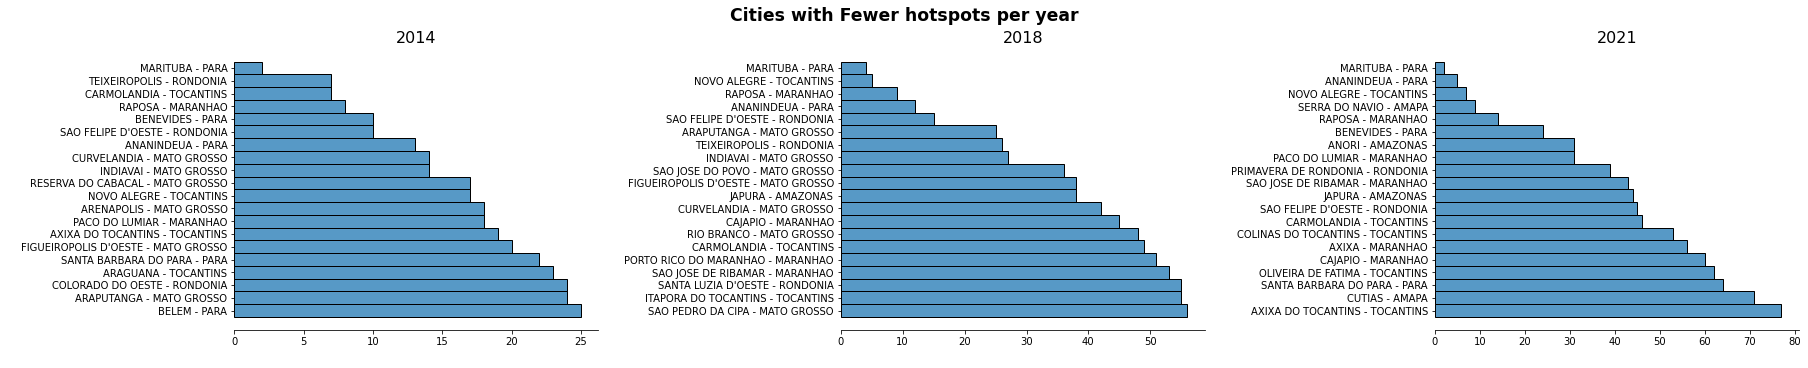

In [ ]:
plot_top_hotspot(dataset, how_many=20, ascending=True)

#### List of maijors hotspot cities

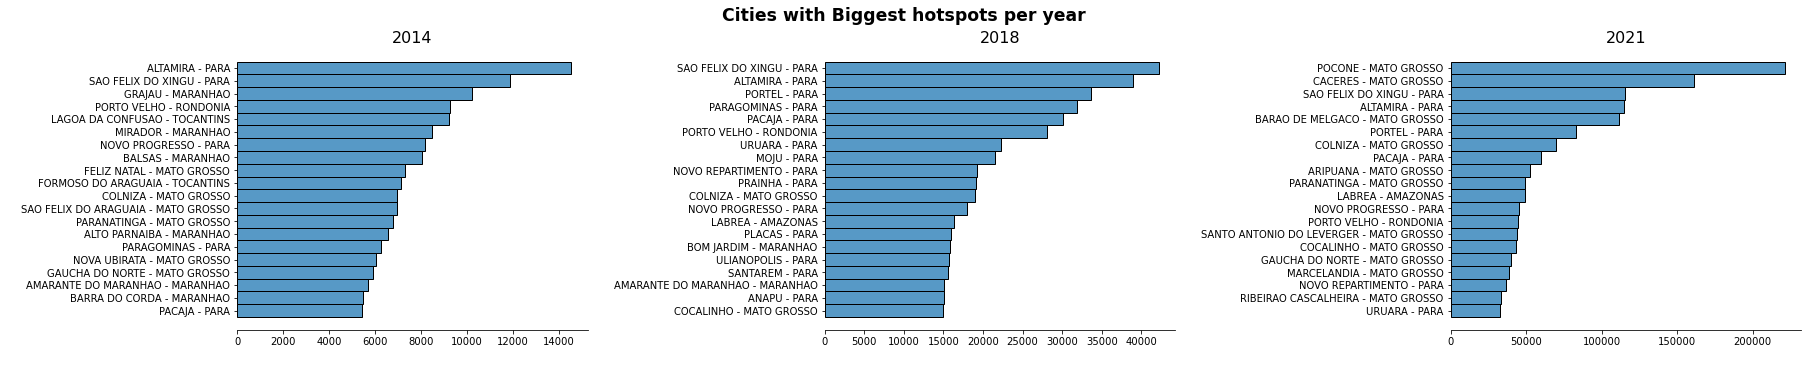

In [ ]:
plot_top_hotspot(dataset, how_many=20, ascending=False)

### Relationship between risk fire categories and IPS dimensions

In [ ]:
def plot_indicators(data, indicators):
    for idx, ind in enumerate(indicators):
        plt.scatter(data.index, data[ind], label=ind, s=100, ec="white", zorder=2)
        plt.plot(data.index, data[ind])
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

In [ ]:
def plot_label_x_features(features_names, plot_title):
    index_order = ["MUITO_BAIXO", "BAIXO", "MODERADO", "ALTO", "MUITO_ALTO"]
    
    cols = 3
    rows = math.ceil(len(YEARS_AVAILABLE) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(25, 5), constrained_layout=True)   
    fig.suptitle(plot_title, fontsize="xx-large", fontweight='heavy')

    for idx, ax in enumerate(axes):
        year = YEARS_AVAILABLE[idx]
        yeardf = dataset[dataset["ano"] == year]

        features = yeardf[features_names]
        data = features.groupby(by="riscofogocat").mean().round(2)
        data = data.reindex(index_order)

        ax.set_title(year, fontdict={'fontsize': 16})
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")

        # Remove axes splines
        for spin in ['top', 'left', 'right']:
            ax.spines[spin].set_visible(False)

        for i, col in enumerate(data.columns):
            ax.scatter(data.index, data[col], label=col, s=100, ec="white", zorder=2)
            ax.plot(data.index, data[col])
            ax.legend(bbox_to_anchor=(1, 1), loc="upper left")

__Risk Fire vs IPS Amazônia__

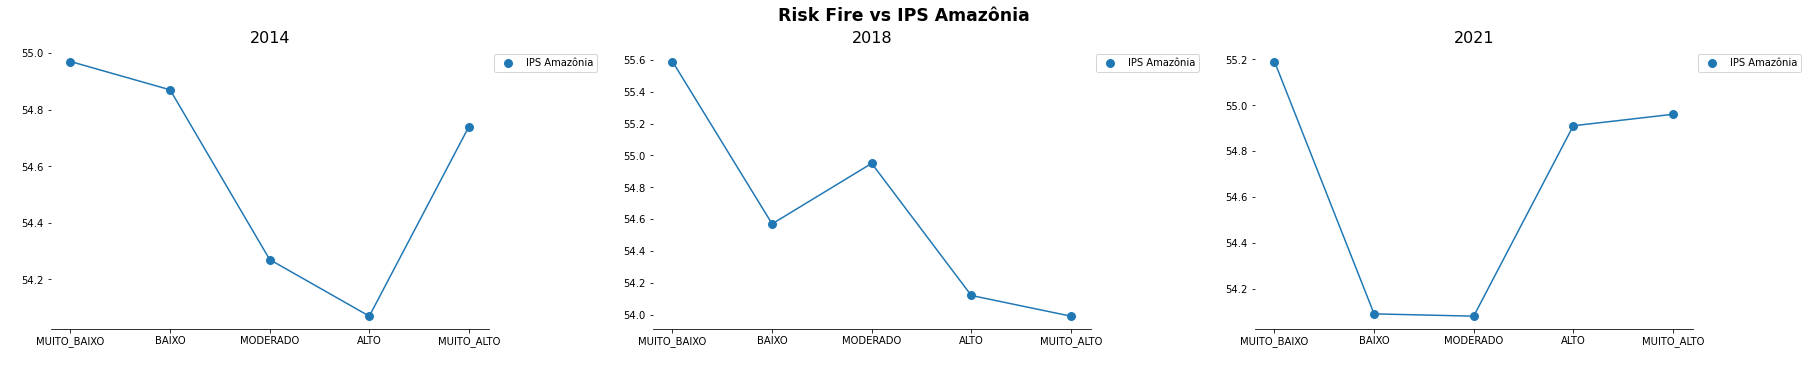

In [ ]:
features_names = ["riscofogocat", "IPS Amazônia"]
plot_label_x_features(features_names, "Risk Fire vs IPS Amazônia")

### Plot Risk Fire vs Dimensions

__Risk Fire vs SPI Dimensions__

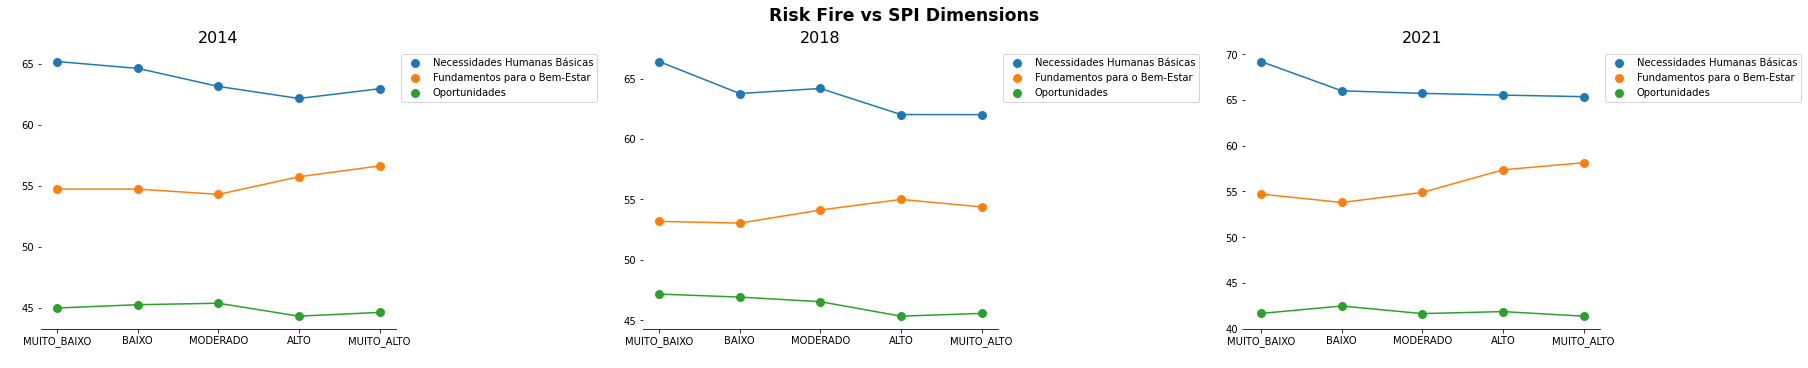

In [ ]:
features_names = ["riscofogocat", "Necessidades Humanas Básicas", "Fundamentos para o Bem-Estar", "Oportunidades"]
plot_label_x_features(features_names, "Risk Fire vs SPI Dimensions")

### Plot Risk Fire vs Components

__Risk Fire vs "Necessidades Humanas Básicas" SPI Component__

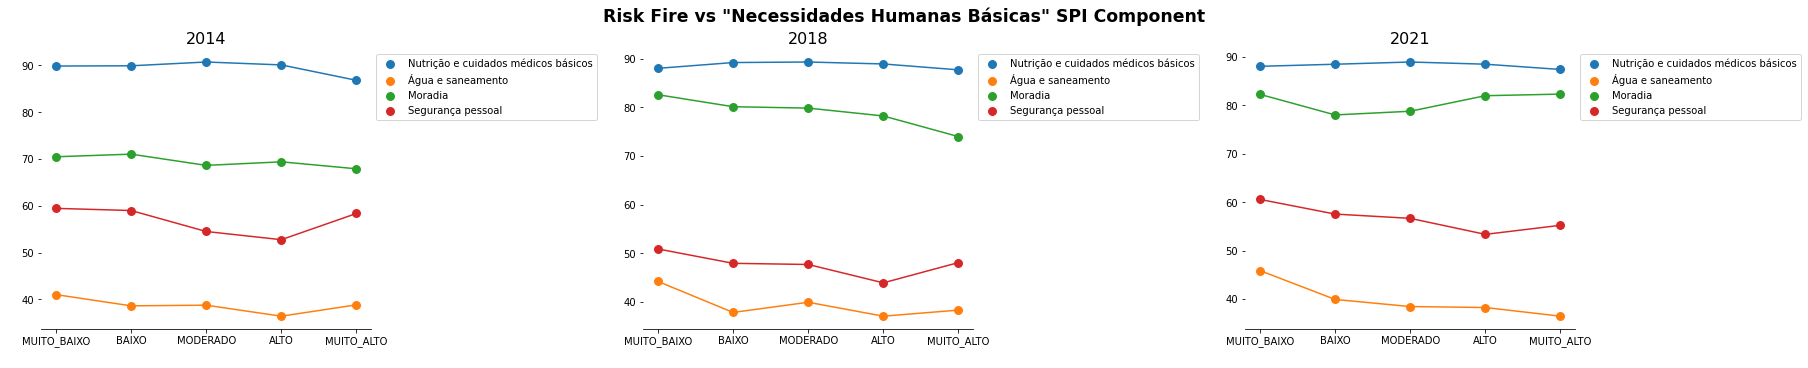

In [ ]:
features_names = ["riscofogocat", "Nutrição e cuidados médicos básicos", "Água e saneamento","Moradia","Segurança pessoal"]
plot_label_x_features(features_names, "Risk Fire vs \"Necessidades Humanas Básicas\" SPI Component")

__Risk Fire vs "Fundamentos para o Bem-Estar" SPI Component__

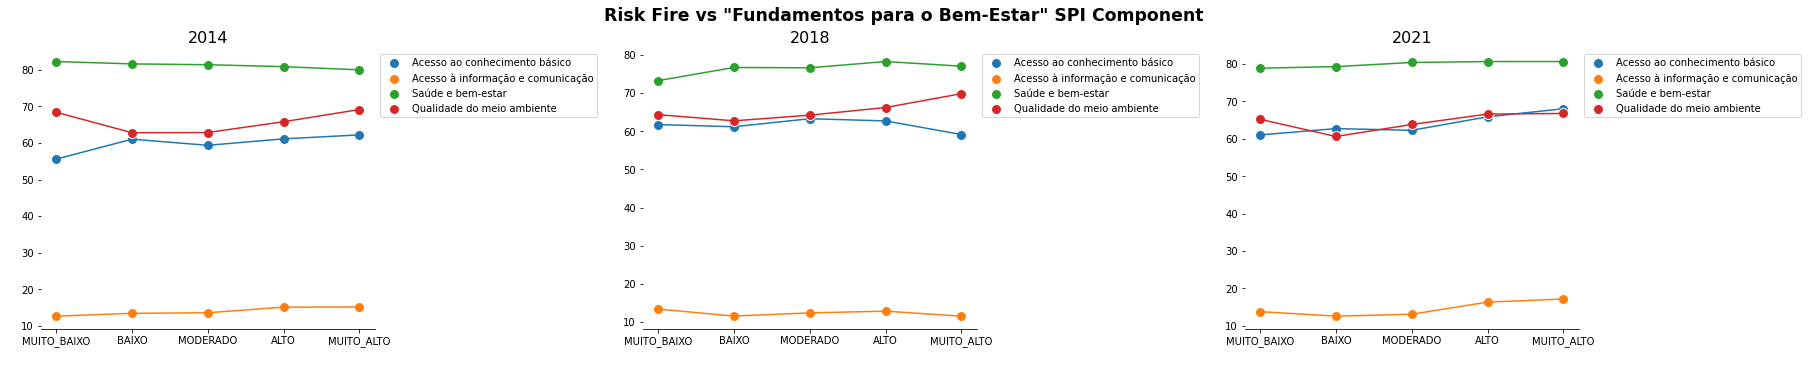

In [ ]:
features_names = ["riscofogocat", "Acesso ao conhecimento básico", "Acesso à informação e comunicação", "Saúde e bem-estar", "Qualidade do meio ambiente"]
plot_label_x_features(features_names, "Risk Fire vs \"Fundamentos para o Bem-Estar\" SPI Component")

__Risk Fire vs "Oportunidades" SPI Component__

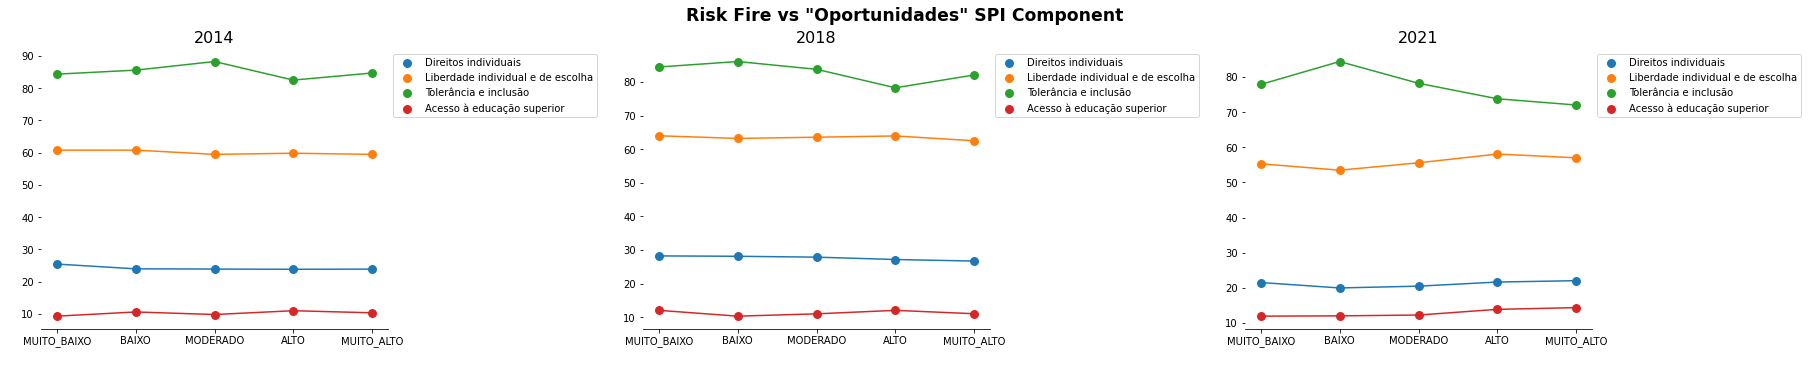

In [ ]:
features_names = ["riscofogocat", "Direitos individuais", "Liberdade individual e de escolha", "Tolerância e inclusão", "Acesso à educação superior"]
plot_label_x_features(features_names, "Risk Fire vs \"Oportunidades\" SPI Component")

### Plot Risk Fire vs Indicators

```
  _   _                        _     _           _             _   _                                         ____    __      _               
 | \ | | ___  ___ ___  ___ ___(_) __| | __ _  __| | ___  ___  | | | |_   _ _ __ ___   __ _ _ __   __ _ ___  | __ )  /_/_ ___(_) ___ __ _ ___ 
 |  \| |/ _ \/ __/ _ \/ __/ __| |/ _` |/ _` |/ _` |/ _ \/ __| | |_| | | | | '_ ` _ \ / _` | '_ \ / _` / __| |  _ \ / _` / __| |/ __/ _` / __|
 | |\  |  __/ (_|  __/\__ \__ \ | (_| | (_| | (_| |  __/\__ \ |  _  | |_| | | | | | | (_| | | | | (_| \__ \ | |_) | (_| \__ \ | (_| (_| \__ \
 |_| \_|\___|\___\___||___/___/_|\__,_|\__,_|\__,_|\___||___/ |_| |_|\__,_|_| |_| |_|\__,_|_| |_|\__,_|___/ |____/ \__,_|___/_|\___\__,_|___/
 ```

__Risk Fire vs "Nutrição e cuidados médicos básicos" SPI Indicator__

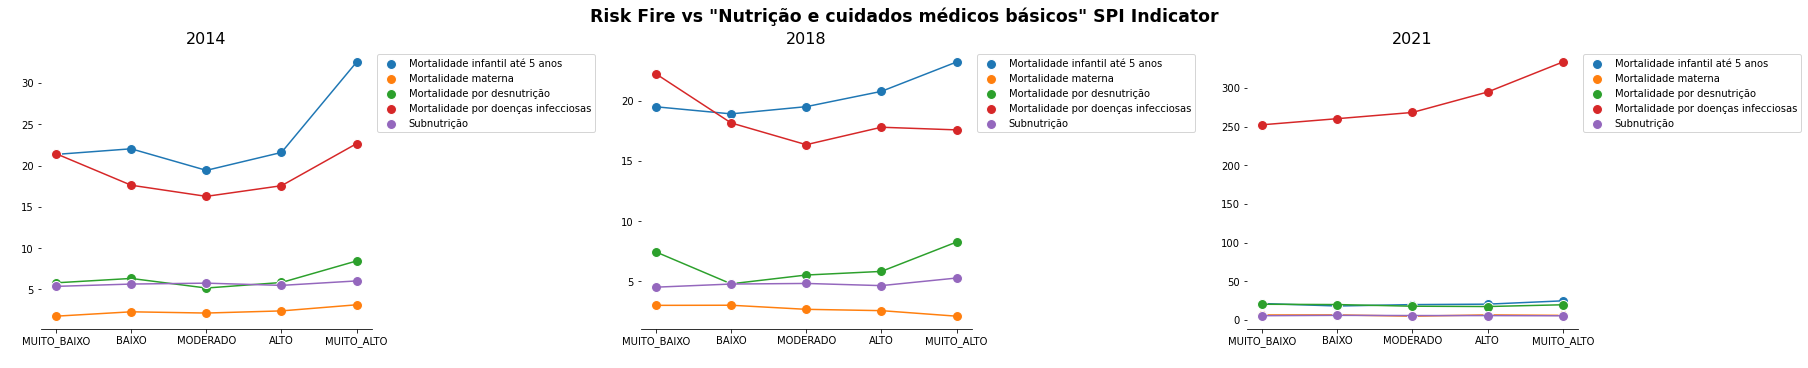

In [31]:
features_names = ["riscofogocat", "Mortalidade infantil até 5 anos", "Mortalidade materna", "Mortalidade por desnutrição", "Mortalidade por doenças infecciosas", "Subnutrição"]
plot_label_x_features(features_names, "Risk Fire vs \"Nutrição e cuidados médicos básicos\" SPI Indicator")

__Risk Fire vs "Água e saneamento" SPI Indicator__

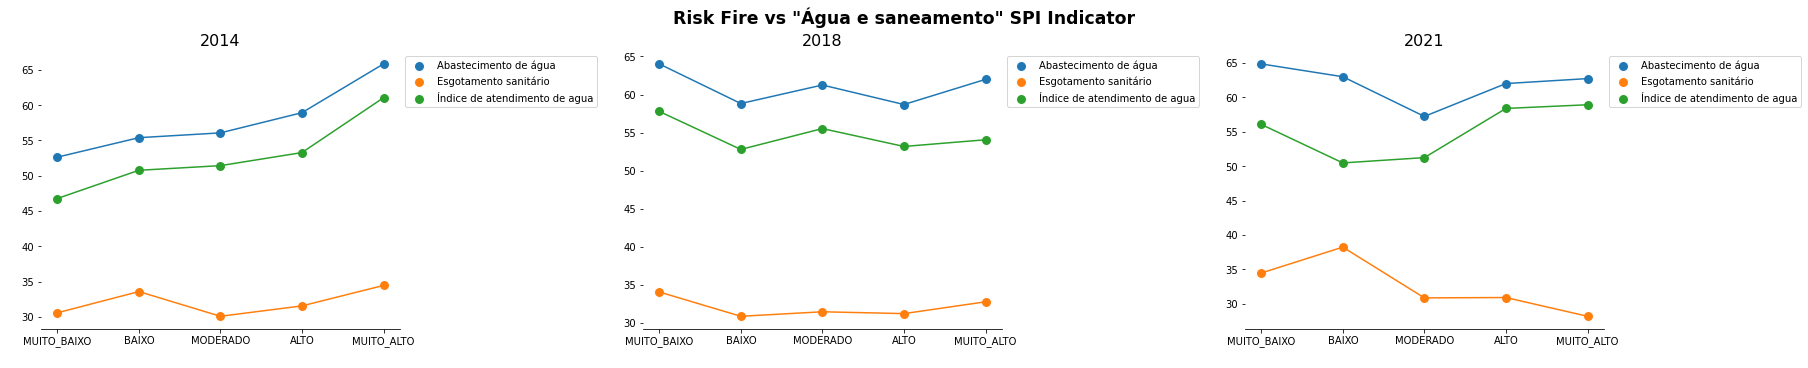

In [ ]:
features_names = ["riscofogocat", "Abastecimento de água", "Esgotamento sanitário", "Índice de atendimento de agua"]
plot_label_x_features(features_names, "Risk Fire vs \"Água e saneamento\" SPI Indicator")

__Risk Fire vs "Moradia" SPI Indicator__

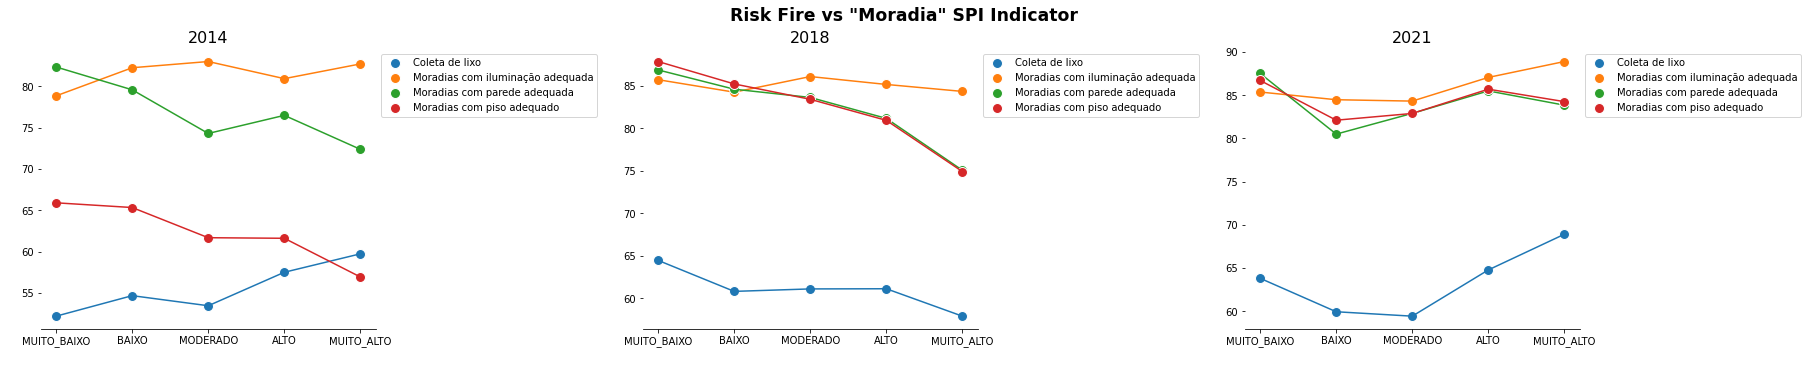

In [ ]:
features_names = ["riscofogocat", "Coleta de lixo", "Moradias com iluminação adequada", "Moradias com parede adequada", "Moradias com piso adequado"]
plot_label_x_features(features_names, "Risk Fire vs \"Moradia\" SPI Indicator")

__Risk Fire vs "Segurança pessoal" SPI Indicator__

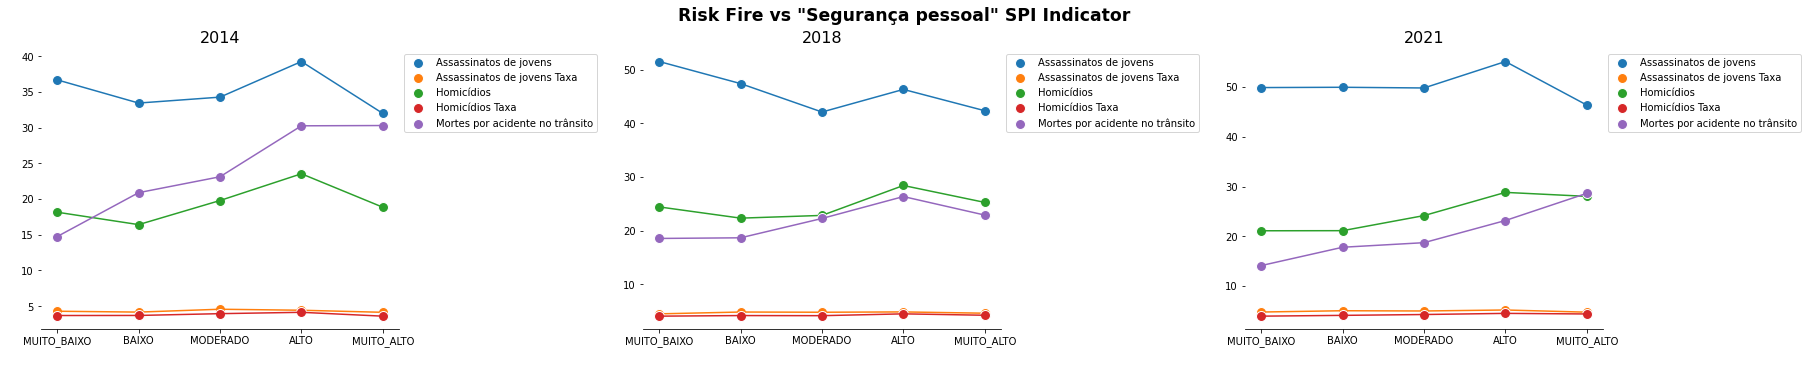

In [ ]:
features_names = ["riscofogocat", "Assassinatos de jovens", "Assassinatos de jovens Taxa", "Homicídios", "Homicídios Taxa", "Mortes por acidente no trânsito"]
plot_label_x_features(features_names, "Risk Fire vs \"Segurança pessoal\" SPI Indicator")

```
  _____                _                            _                                              ____                                 _             
 |  ___|   _ _ __   __| | __ _ _ __ ___   ___ _ __ | |_ ___  ___   _ __   __ _ _ __ __ _    ___   | __ )  ___ _ __ ___         ___  ___| |_ __ _ _ __ 
 | |_ | | | | '_ \ / _` |/ _` | '_ ` _ \ / _ \ '_ \| __/ _ \/ __| | '_ \ / _` | '__/ _` |  / _ \  |  _ \ / _ \ '_ ` _ \ _____ / _ \/ __| __/ _` | '__|
 |  _|| |_| | | | | (_| | (_| | | | | | |  __/ | | | || (_) \__ \ | |_) | (_| | | | (_| | | (_) | | |_) |  __/ | | | | |_____|  __/\__ \ || (_| | |   
 |_|   \__,_|_| |_|\__,_|\__,_|_| |_| |_|\___|_| |_|\__\___/|___/ | .__/ \__,_|_|  \__,_|  \___/  |____/ \___|_| |_| |_|      \___||___/\__\__,_|_|   
                                                                  |_|                                                                                 

```

__Risk Fire vs "Acesso ao conhecimento básico" SPI Indicator__

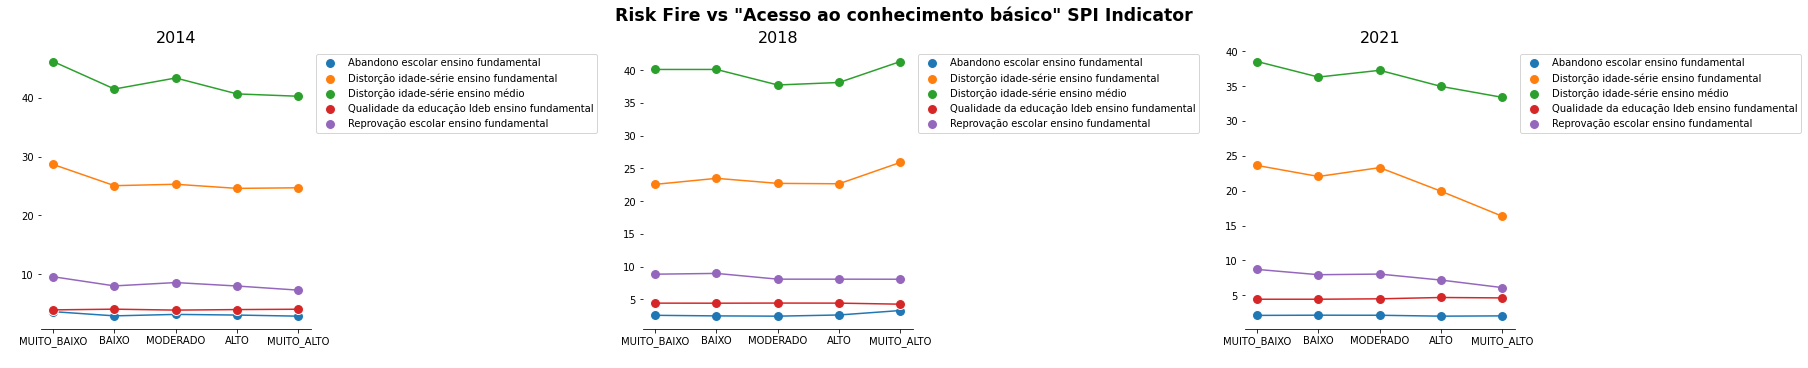

In [ ]:
features_names = ["riscofogocat", "Abandono escolar ensino fundamental", "Distorção idade-série ensino fundamental", "Distorção idade-série ensino médio", "Qualidade da educação Ideb ensino fundamental", "Reprovação escolar ensino fundamental"]
plot_label_x_features(features_names, "Risk Fire vs \"Acesso ao conhecimento básico\" SPI Indicator")

__Risk Fire vs "Acesso à informação e comunicação" SPI Indicator__

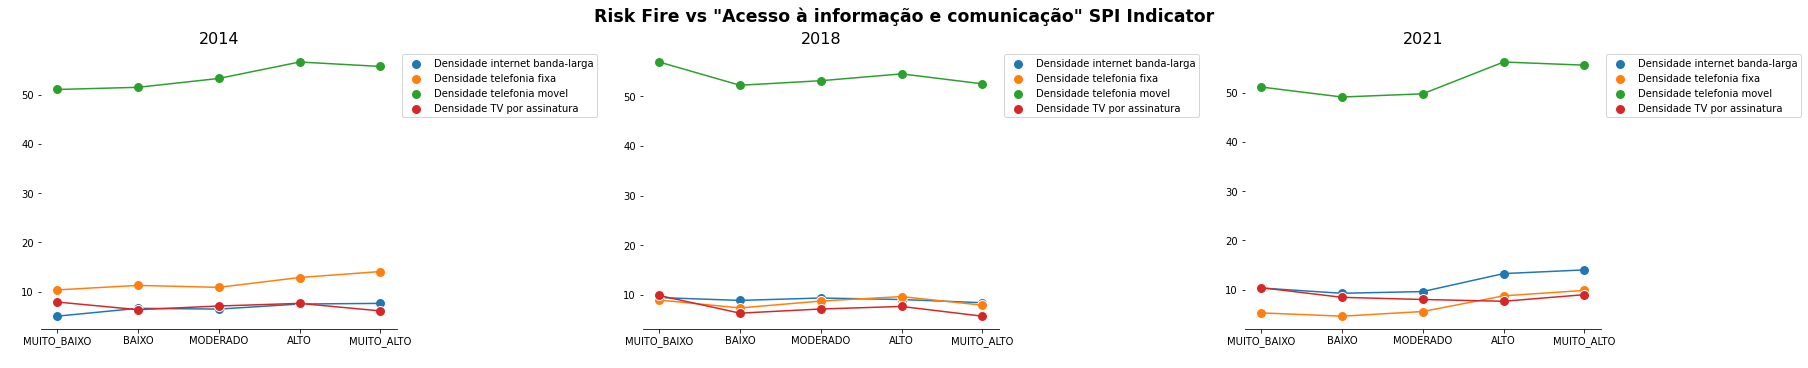

In [ ]:
features_names = ["riscofogocat", "Densidade internet banda-larga", "Densidade telefonia fixa", "Densidade telefonia movel", "Densidade TV por assinatura"]
plot_label_x_features(features_names, "Risk Fire vs \"Acesso à informação e comunicação\" SPI Indicator")

__Risk Fire vs "Saúde e bem-estar" SPI Indicator__

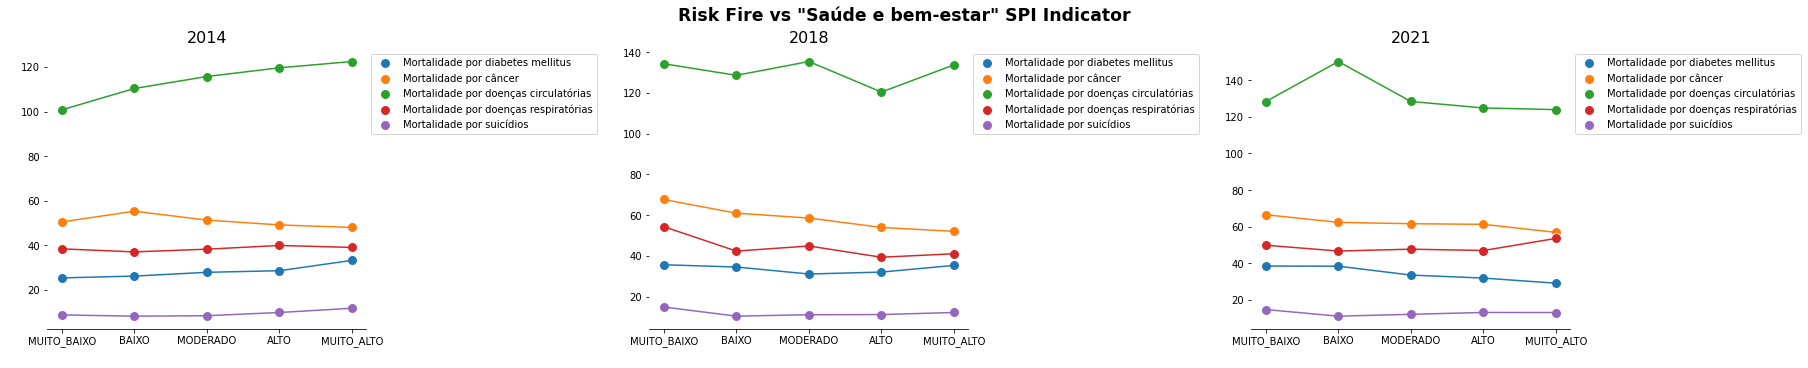

In [ ]:
features_names = ["riscofogocat", "Mortalidade por diabetes mellitus", "Mortalidade por câncer", "Mortalidade por doenças circulatórias", "Mortalidade por doenças respiratórias", "Mortalidade por suicídios"]
plot_label_x_features(features_names, "Risk Fire vs \"Saúde e bem-estar\" SPI Indicator")

__Risk Fire vs "Qualidade do meio ambiente" SPI Indicator__

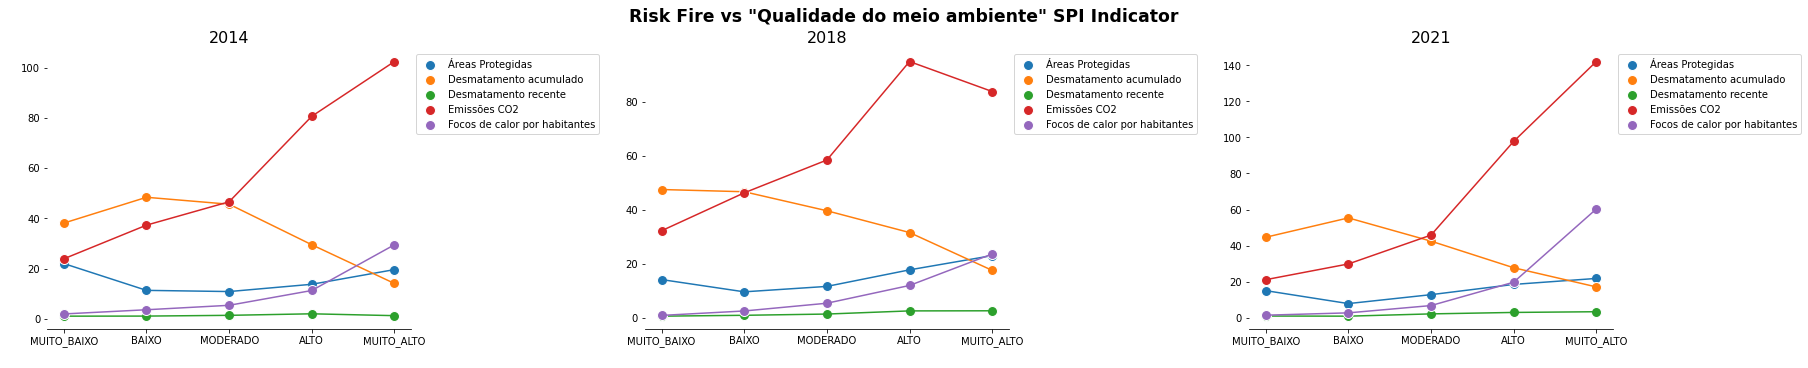

In [ ]:
features_names = ["riscofogocat", "Áreas Protegidas", "Desmatamento acumulado", "Desmatamento recente", "Emissões CO2", "Focos de calor por habitantes"]
plot_label_x_features(features_names, "Risk Fire vs \"Qualidade do meio ambiente\" SPI Indicator")

```
   ___                   _               _     _           _           
  / _ \ _ __   ___  _ __| |_ _   _ _ __ (_) __| | __ _  __| | ___  ___ 
 | | | | '_ \ / _ \| '__| __| | | | '_ \| |/ _` |/ _` |/ _` |/ _ \/ __|
 | |_| | |_) | (_) | |  | |_| |_| | | | | | (_| | (_| | (_| |  __/\__ \
  \___/| .__/ \___/|_|   \__|\__,_|_| |_|_|\__,_|\__,_|\__,_|\___||___/
       |_|                                                             
```

__Risk Fire vs "Direitos individuais" SPI Indicator__

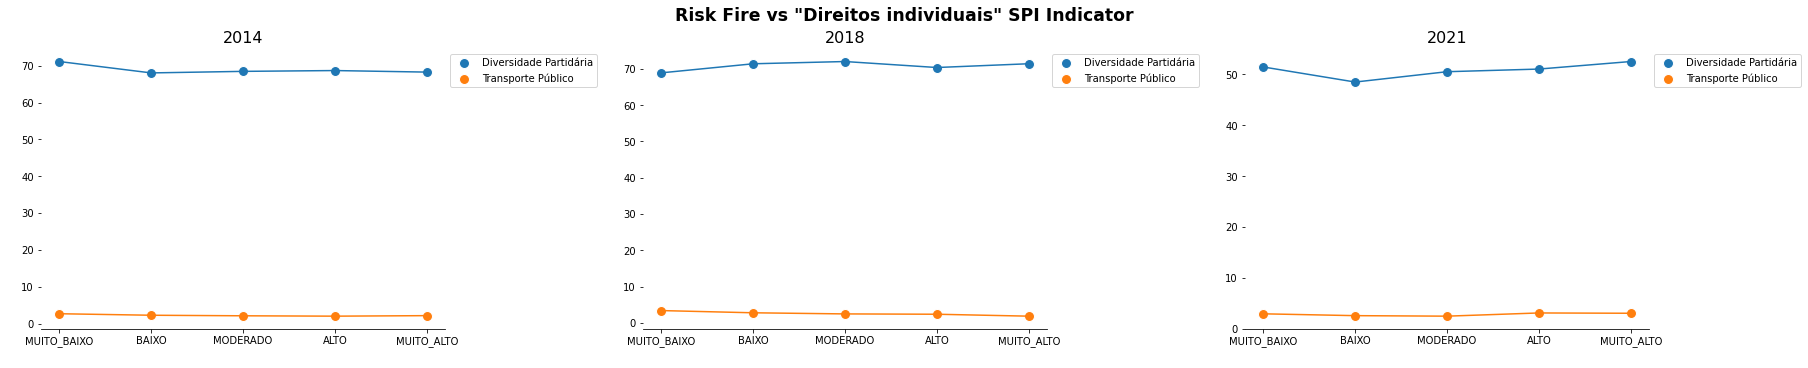

In [ ]:
features_names = ["riscofogocat", "Diversidade Partidária", "Transporte Público"]
plot_label_x_features(features_names, "Risk Fire vs \"Direitos individuais\" SPI Indicator")

__Risk Fire vs "Liberdades individuais" SPI Indicator__

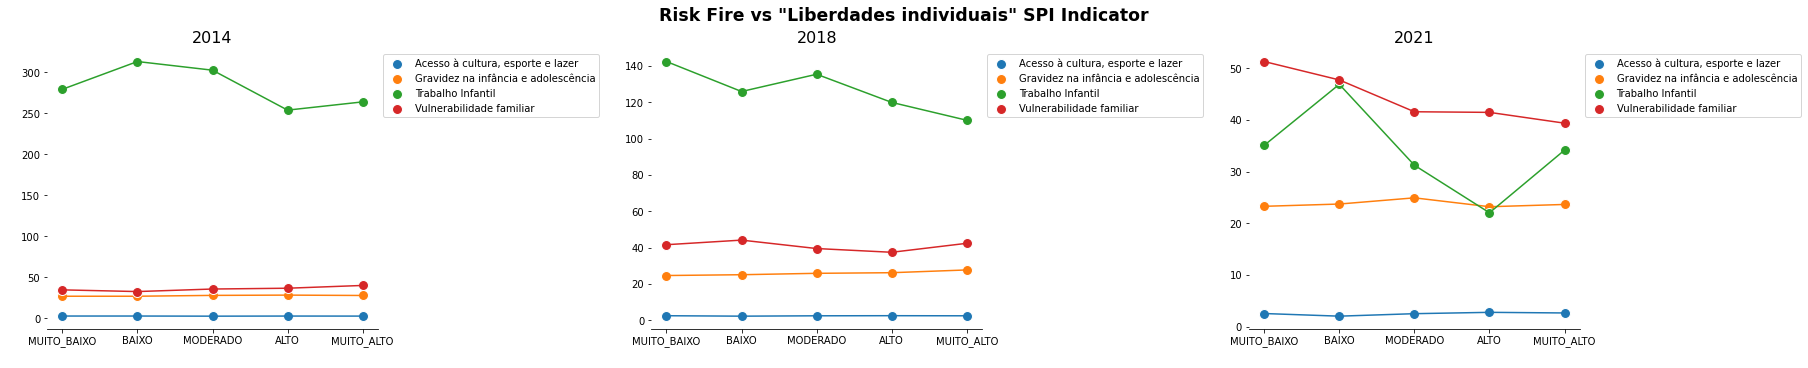

In [ ]:
features_names = ["riscofogocat", "Acesso à cultura, esporte e lazer", "Gravidez na infância e adolescência", "Trabalho Infantil" , "Vulnerabilidade familiar"]
plot_label_x_features(features_names, "Risk Fire vs \"Liberdades individuais\" SPI Indicator")

__Risk Fire vs "Tolerância e inclusão" SPI Indicator__

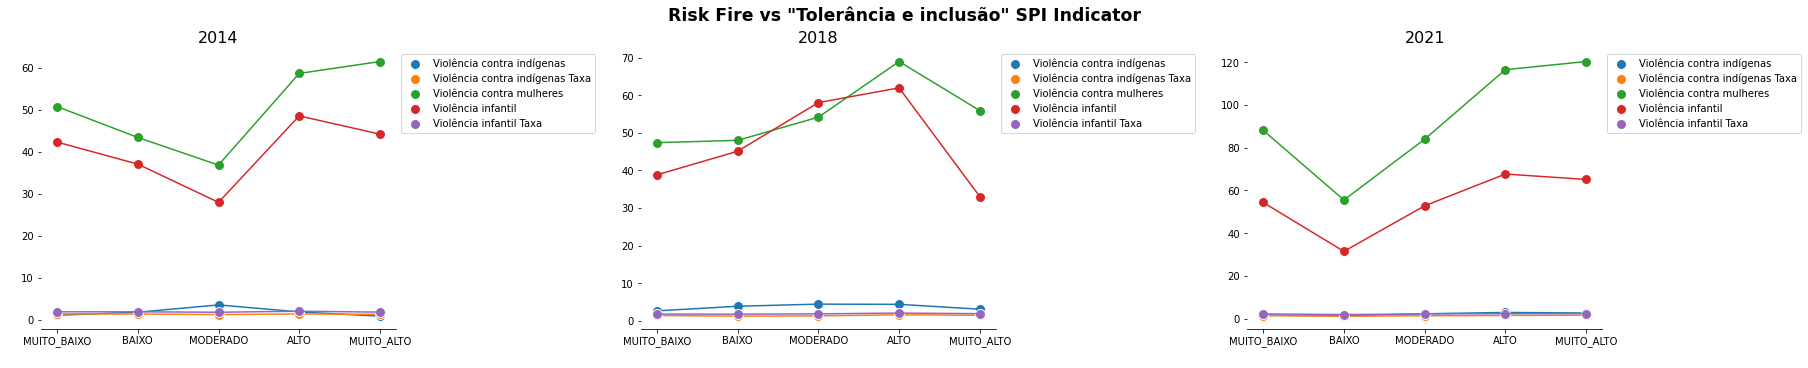

In [ ]:
features_names = ["riscofogocat", "Violência contra indígenas", "Violência contra indígenas Taxa", "Violência contra mulheres", "Violência infantil", "Violência infantil Taxa",]
plot_label_x_features(features_names, "Risk Fire vs \"Tolerância e inclusão\" SPI Indicator")

__Risk Fire vs "Acesso à educação superior" SPI Indicator__

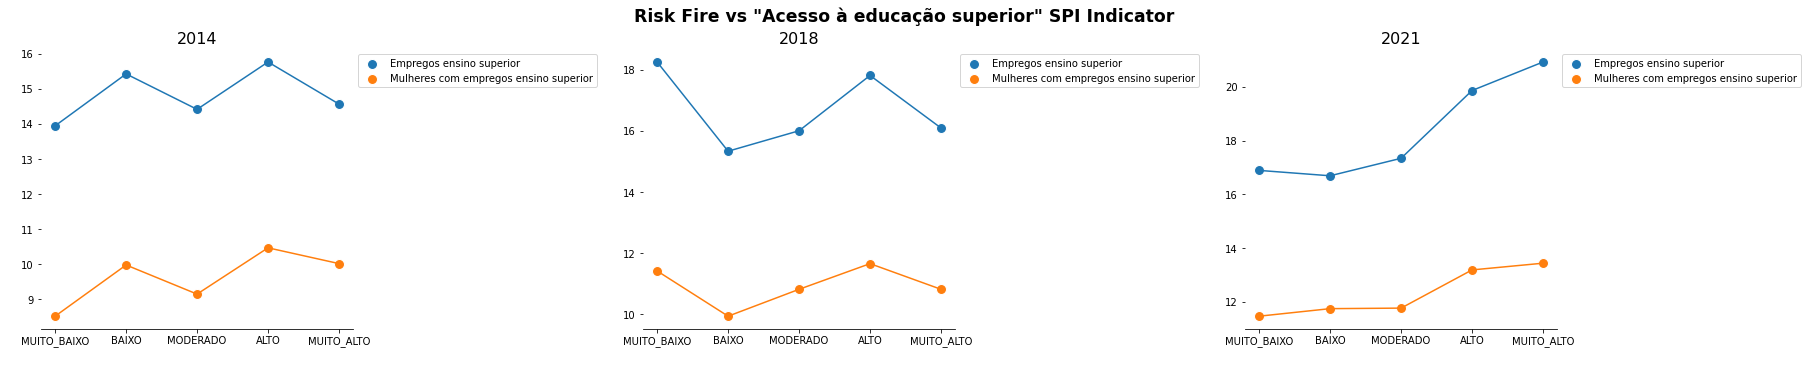

In [ ]:
features_names = ["riscofogocat",  "Empregos ensino superior", "Mulheres com empregos ensino superior"]
plot_label_x_features(features_names, "Risk Fire vs \"Acesso à educação superior\" SPI Indicator")

### Correlation beetwen features of the cities that burn the most

In [ ]:

# list_biggest = []
# for year in YEARS_AVAILABLE:
#     dasy = dataset[dataset.ano == year]
#     list_biggest.append(dasy.sort_values(by=["fococalor"], ascending=False)[:20])
    
# biggest_df = pd.concat(list_biggest)

# ## plot pair correlation beetween featres.
# sns.set_theme(style="ticks")
# sns.pairplot(biggest_df)

### Get top Amazon IPS cities

In [ ]:
def get_top_spi(dataset, head=10, ascending=True): 
    df = dataset.copy()
    df["regiao"] = df[['municipio', 'estado']].agg(' - '.join, axis=1)
    group = df.groupby("regiao")
    return group['IPS Amazônia'].sum().sort_values(ascending=ascending)[:head]


def get_max_spi(dataset, year):
    max_spi = dataset[(dataset["ano"] == year)]["IPS Amazônia"].max()
    return dataset[(dataset["ano"] == year) & (dataset["IPS Amazônia"] == max_spi)]


def get_min_spi(dataset, year):
    min_spi = dataset[(dataset["ano"] == year)]["IPS Amazônia"].min()
    return dataset[(dataset["ano"] == year) & (dataset["IPS Amazônia"] == min_spi)]


def plot_top_spi(dataset, how_many=10, ascending=True):
    cols = 3
    rows = math.ceil(len(YEARS_AVAILABLE) / cols)
    
    fig, axes = plt.subplots(rows, cols, figsize=(25, 5), constrained_layout=True)

    title = "Cities with {} Amazon SPI per year".format("Fewer" if ascending else "Biggest")
    fig.suptitle(title, fontsize="xx-large", fontweight='heavy')

    for idx, ax in enumerate(axes):
        year = YEARS_AVAILABLE[idx]
        yeardf = dataset[(dataset["ano"] == year)]
        tt = get_top_spi(yeardf, head=how_many, ascending=ascending)

        ax.set_title(year, fontdict={'fontsize': 16})
        ax.set_xlabel(" ")
        ax.set_ylabel(" ")
        
        # Remove axes splines
        for spin in ['top', 'left', 'right']:
            ax.spines[spin].set_visible(False)
            
        sns.histplot(data=tt, y=tt.index, weights=tt.values, ax=ax)

#### List of minors SPImazon spi cities

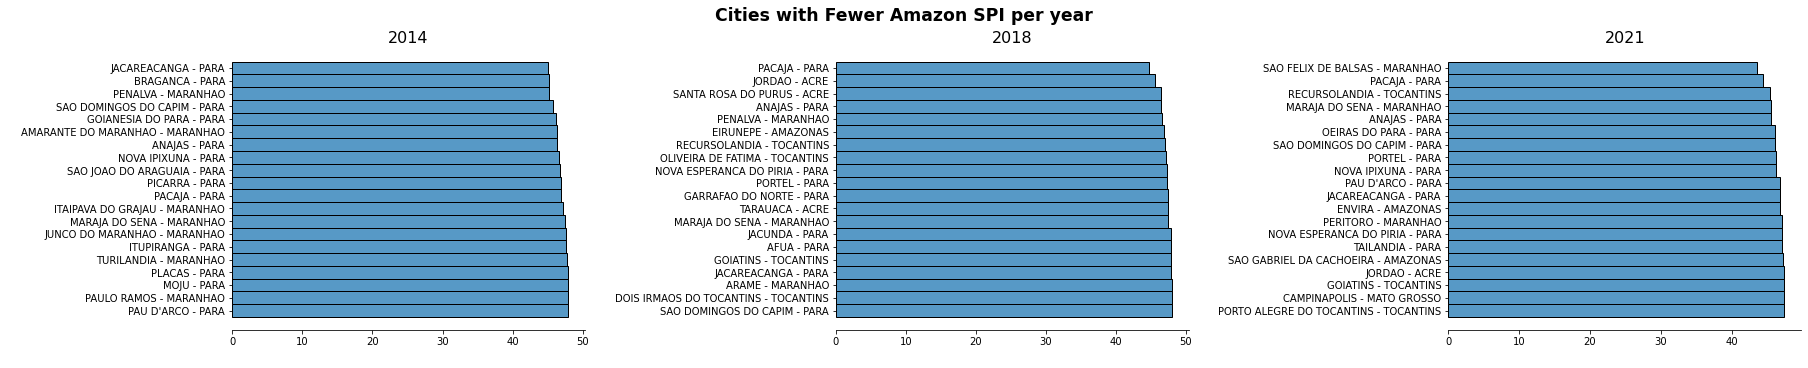

In [ ]:
plot_top_spi(dataset, how_many=20, ascending=True)

#### List of maijors SPImazon spi cities

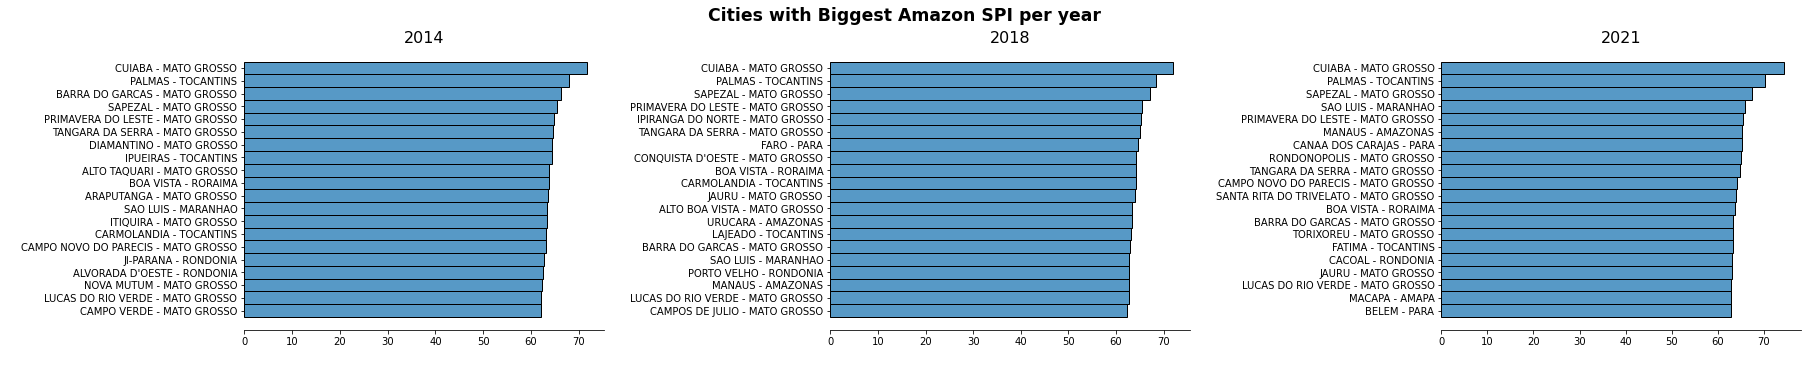

In [ ]:
plot_top_spi(dataset, how_many=20, ascending=False)

In [ ]:
# Lista os municípios abaixo da média ips e que foram os que mais queimaram
year = 2021
mean =  dataset["Media IPS"]

low_spi_mean = dataset[(dataset["IPS Amazônia"] > mean) & (dataset["ano"] == year)]
low_spi_mean.sort_values(by=["fococalor"], ascending=[False])

KeyError: 'Media IPS'

In [ ]:
year = 2021

low_of_spi_mean = dataset[(dataset["IPS Amazônia"] < dataset["Media IPS"]) & (dataset["ano"] == year)]
low_of_spi_mean.sort_values(by="fococalor", ascending=False)

In [ ]:
 dataset[dataset["municipio"] == "TEIXEIROPOLIS"]

### Visualize the correlation in a matrix

In [ ]:
# def show_heatmap_corr(dataset):
#     fig, ax = plt.subplots(figsize=(50,50))
#     sns.heatmap(
#         dataset.corr(), 
#         vmax=1.0, 
#         center=0, 
#         fmt='.2f',
#         square=True, 
#         linewidths=.5, 
#         annot=True, 
#         cbar_kws={"shrink": .70}
#     )
    
    
# xxx = dataset[dataset.ano == 2021][['riscofogocat', 'IPS Amazônia']]    
# show_heatmap_corr(xxx)

In [ ]:
xxx = dataset[dataset.ano == 2021][['riscofogocat', 'IPS Amazônia']]    

xxx['c'] = pd.factorize(xxx.riscofogocat )[0]

sns.set_theme(style="ticks")
sns.pairplot(xxx)

In [ ]:
# citie_name = "NOVA IPIXUNA"
# citie_data = dataset[dataset.municipio == citie_name]

In [ ]:
# compare hotspot and Amazon IPS
# labels = [ "frp", "riscofogo", "IPS Amazônia"]
# indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]]]
# plot_indicators(citie_data, indicators, labels)

# # Show Dimensions
# labels = ["Necessidades Humanas Básicas", "Fundamentos para o Bem-Estar", "Oportunidades"]
# indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]]]
# plot_indicators(citie_data, indicators, labels)
# plt.show()

# # Show Necessidades Humanas Básicas components
# labels = ["Nutrição e cuidados médicos básicos", "Água e saneamento", "Moradia", "Segurança pessoal"]
# indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]], citie_data[labels[3]]]
# plot_indicators(citie_data, indicators, labels)

# # Show Fundamentos para o Bem-Estar components
# labels = ["Acesso ao conhecimento básico", "Acesso à informação e comunicação", "Saúde e bem-estar", "Qualidade do meio ambiente"]
# indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]], citie_data[labels[3]]]
# plot_indicators(citie_data, indicators, labels)

# # Show Oportunidades components
# labels = labels = ["Direitos individuais", "Liberdade individual e de escolha", "Tolerância e inclusão", "Acesso à educação superior"]
# indicators = [citie_data[labels[0]], citie_data[labels[1]], citie_data[labels[2]], citie_data[labels[3]]]
# plot_indicators(citie_data, indicators, labels)